## 1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

In [ ]:
!pip install seaborn

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Загрузите датасет в pandas DataFrame под названием df.

In [84]:
df = pd.read_csv('train.csv')


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [86]:
# Определение отсутствующих значений
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### LotFrontage

In [87]:
# Определить тип данных и уникальные значения в столбце "LotFrontage" (Длина фасада)
df['LotFrontage'].info()
df['LotFrontage'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [88]:
#Заполним пустые ячейки среднеми значениями
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [89]:
df['LotFrontage'].unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  70.04995837,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

### Alley

In [90]:
# Определить тип данных и уникальные значения в столбце "Alley"
df['Alley'].info()
df['Alley'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'Grvl', 'Pave'], dtype=object)

In [91]:
# В связи с тем, что аллеи есть не во всех адресах, заполним пустые ячейки значением "No Alley"
df['Alley'] = df['Alley'].fillna("None Alley")

### MasVnrType

In [92]:
# Определить тип данных и уникальные значения в столбце "MasVnrType" Тип облицовки каменной кладки
df['MasVnrType'].info()
df['MasVnrType'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
588 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [93]:
#Заполним пустые ячейки значением "None"
df['MasVnrType'] = df['MasVnrType'].fillna('None')

### MasVnrArea

In [94]:
# Определить тип данных и уникальные значения в столбце "MasVnrArea" Площадь облицовки каменной кладки в квадратных футах
df['MasVnrArea'].info()
df['MasVnrArea'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [95]:
# Заполним пустые ячейки значением 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [96]:
df['MasVnrArea'].info()
df['MasVnrArea'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

### BsmtQual

In [98]:
# Определить тип данных и уникальные значения в столбце "BsmtQual" Высота подвала
df['BsmtQual'].info()
df['BsmtQual'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [99]:
# Заполним пустые ячейки значением "No Basement"
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')

### BsmtCond

In [100]:
# Определить тип данных и уникальные значения в столбце "BsmtCond" Общее состояние подвала
df['BsmtCond'].info()
df['BsmtCond'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtCond
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [101]:
# Заполним пустые ячейки значением "No Basement"
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')

### BsmtExposure

In [102]:
# Определить тип данных и уникальные значения в столбце "BsmtExposure" стены на уровне пешеходной дорожки или сада
df['BsmtExposure'].info()
df['BsmtExposure'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtExposure
Non-Null Count  Dtype 
--------------  ----- 
1422 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [103]:
# Заполним пустые ячейки значением "No Basement"
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')

### BsmtFinType1

In [104]:
# Определить тип данных и уникальные значения в столбце "BsmtFinType1" Оценка готовой площади подвала
df['BsmtFinType1'].info()
df['BsmtFinType1'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinType1
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [105]:
# Заполним пустые ячейки значением "No Basement"
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

### BsmtFinType2

In [106]:
# Определить тип данных и уникальные значения в столбце "BsmtFinType2" Оценка готовой площади подвала (при наличии нескольких типов)
df['BsmtFinType2'].info()
df['BsmtFinType2'].unique()


<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinType2
Non-Null Count  Dtype 
--------------  ----- 
1422 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [107]:
# Заполним пустые ячейки значением "No Basement"
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

### Electrical

In [108]:
# Определить тип данных и уникальные значения в столбце "Electrical" Электрическая система
df['Electrical'].info()
df['Electrical'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [109]:
# Заполним пустые ячейки значением "None"
df['Electrical'] = df['Electrical'].fillna('None')

### FireplaceQu

In [110]:
# Определить тип данных и уникальные значения в столбце "FireplaceQu" Качество камина
df['FireplaceQu'].info()
df['FireplaceQu'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: FireplaceQu
Non-Null Count  Dtype 
--------------  ----- 
770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
# Определение не пустых значений в столбце "FireplaceQu" для принятия решения, какими данными заполнять пустые значения
# df['FireplaceQu'].dropna()

In [111]:
# Заполним пустые ячейки значением "No Fireplace"
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

### GarageType

In [48]:
# Определение пустых значений в столбце "GarageType" Тип гаража
# df['GarageType'].isnull().sum()

In [113]:
# Определить тип данных и уникальные значения в столбце "GarageType" Тип гаража
df['GarageType'].info()
df['GarageType'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageType
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [114]:
# Заполним пустые ячейки значением "No Garage"
df['GarageType'] = df['GarageType'].fillna('No Garage')

### GarageYrBlt

In [115]:
# Определить тип данных и уникальные значения в столбце "GarageYrBlt" Год постройки гаража
df['GarageYrBlt'].info()
df['GarageYrBlt'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [117]:
# Заполним пустые ячейки значением "0"
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [118]:
# Преобразуем тип данных в столбце из float в int, так как значение года должно быть натуральным числом
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [119]:
df['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int32
dtypes: int32(1)
memory usage: 5.8 KB


### GarageFinish

In [120]:
# ООпределить тип данных и уникальные значения в столбце "GarageFinish" Внутренняя отделка гаража
df['GarageFinish'].info()
df['GarageFinish'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageFinish
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [121]:
# Заполним пустые ячейки значением "No Garage"
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

### GarageQual

In [122]:
# Определить тип данных и уникальные значения в столбце "GarageQual" Качество гаража
df['GarageQual'].info()
df['GarageQual'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageQual
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [123]:
# Заполним пустые ячейки значением "No Garage"
df['GarageQual'] = df['GarageQual'].fillna('No Garage')

### GarageCond

In [124]:
# Определить тип данных и уникальные значения в столбце "GarageCond" Состояние гаража
df['GarageCond'].info()
df['GarageCond'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageCond
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [125]:
# Заполним пустые ячейки значением "No Garage"
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

### PoolQC

In [126]:
# Определить тип данных и уникальные значения в столбце "PoolQC" Качество бассейна
df['PoolQC'].info()
df['PoolQC'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: PoolQC
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [127]:
# Заполним пустые ячейки значением "No Pool"
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

### Fence

In [128]:
# Определить тип данных и уникальные значения в столбце "Fence" Качество ограждения
df['Fence'].info()
df['Fence'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Fence
Non-Null Count  Dtype 
--------------  ----- 
281 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [129]:
# Заполним пустые ячейки значением "No Fence"
df['Fence'] = df['Fence'].fillna('No Fence')

### MiscFeature

In [130]:
# Определить тип данных и уникальные значения в столбцее "MiscFeature" Разное
df['MiscFeature'].info()
df['MiscFeature'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MiscFeature
Non-Null Count  Dtype 
--------------  ----- 
54 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [131]:
# Заполним пустые ячейки значением "No Misc"
df['MiscFeature'] = df['MiscFeature'].fillna('No Misc')

### SalePrice

In [137]:
# Определить тип данных "SalePrice" цена
df['SalePrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [138]:
# Преобразуем тип данных в столбце из int во float , так как значение цены должно быть десятичным числом
df['SalePrice'] = df['SalePrice'].astype(float)

#### Выведем датасет с учетом внесенных изменений

In [140]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,250000.0


In [133]:
# Удалим дубликаты
# df.drop_duplicates(inplace=True) в данном датасете их нет, так что закомментирую строку

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Преобразование типов данных любого столбца
# В библиотеке pandas функция "pd.to_numeric()" используется для преобразования объектов в числовой формат. Она преобразует объекты в числа, а все непреобразуемые значения преобразует в `NaN` (Not a Number).

# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

## 4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

Для рещение 4 подзадачи используем не весь датасет, а только интересующие нас столбцы

In [156]:
df1 = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
df4 = df[df1]
df4.head()

,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,208500.0
1,6,1262,2,181500.0
2,7,1786,2,223500.0
3,7,1717,3,140000.0
4,8,2198,3,250000.0


In [157]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   int64  
 1   GrLivArea    1460 non-null   int64  
 2   GarageCars   1460 non-null   int64  
 3   SalePrice    1460 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


### a. Распределение целевой переменной 'SalePrice' можно посмотреть с помощью гистограммы:

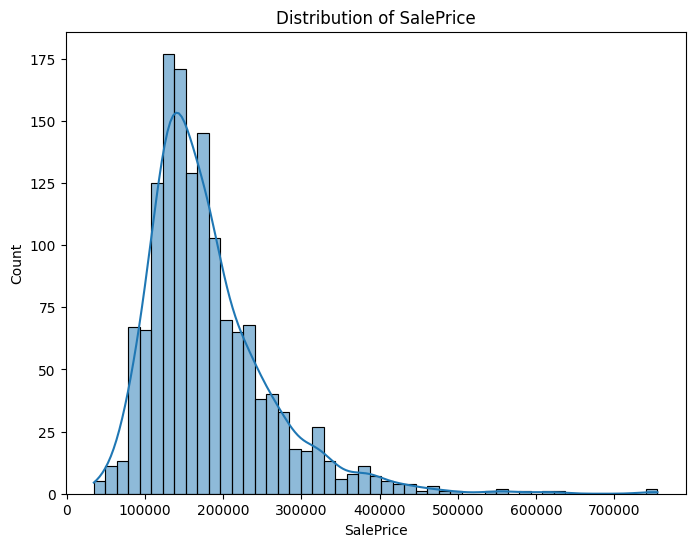

In [151]:
plt.figure(figsize=(8, 6))
sns.histplot(df4["SalePrice"], kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("Distribution of SalePrice")
plt.show()

### b. Взаимосвязи между целевой переменной и другими характеристиками можно исследовать с помощью матрицы корреляции:

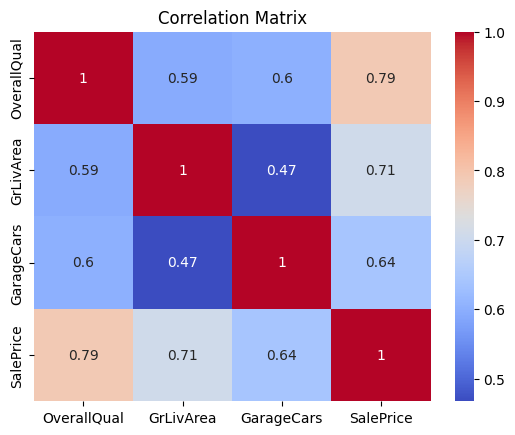

In [152]:
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Для наглядности можно визуализировать также scatter plot:

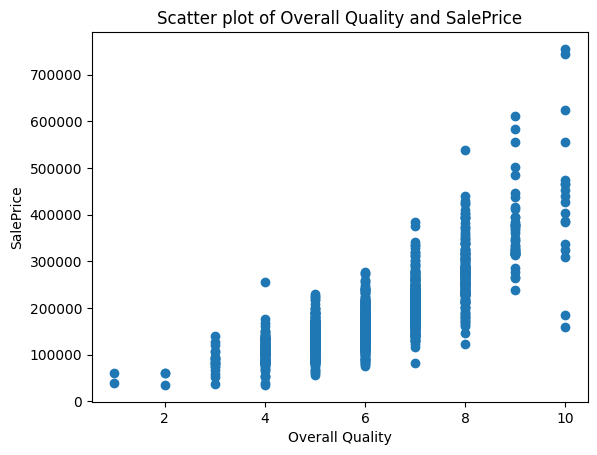

In [153]:
plt.scatter(df4["OverallQual"], df4["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.title("Scatter plot of Overall Quality and SalePrice")
plt.show()

### c. Распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д., можно исследовать аналогичным образом, используя соответствующие графики.

### d. Визуализация данных:

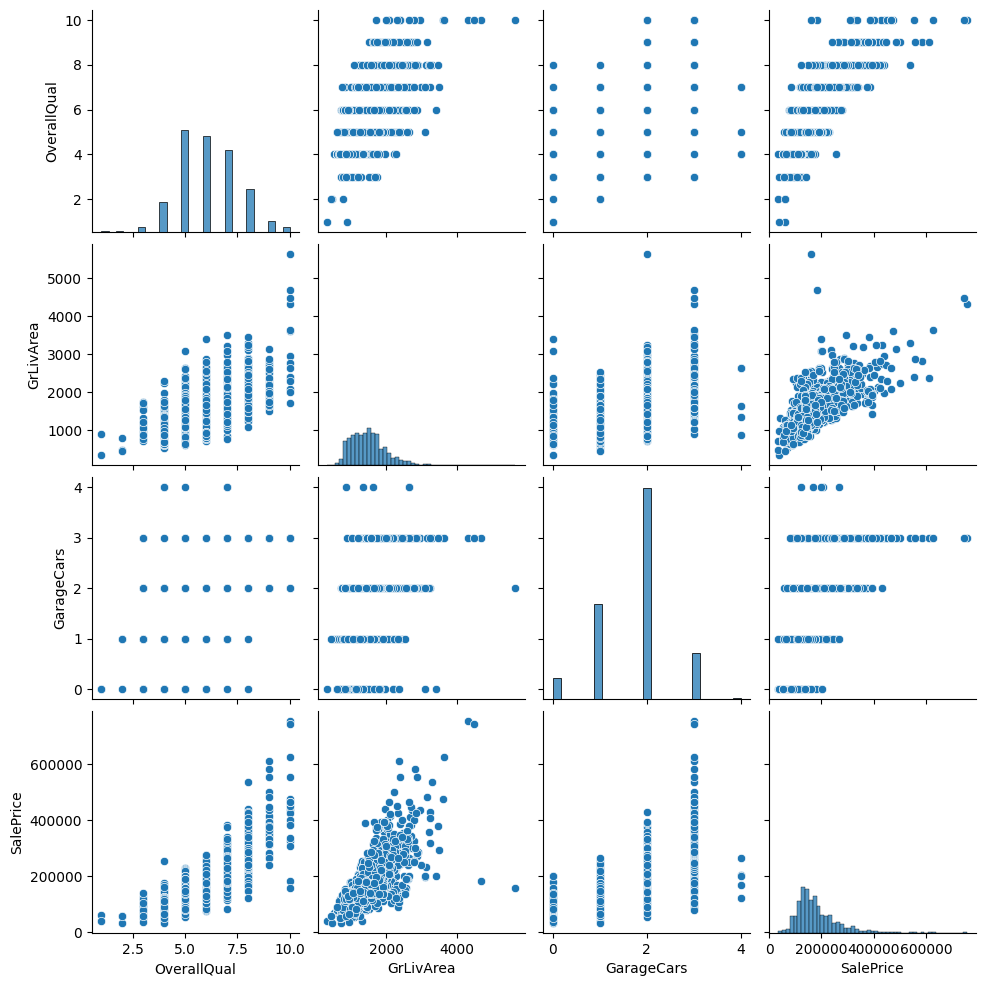

In [158]:
sns.pairplot(df4)
plt.show()

## 5. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [159]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,250000.0


In [ ]:
!pip install scikit-learn

In [166]:
# Проектирование переменных
# One-hot encoding
# data_encoded = pd.get_dummies(df, columns=['MSZoning'])

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])

In [168]:
df['MSZoning'].unique()

array([3, 4, 0, 1, 2])

In [169]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,208500.0
1,2,20,3,80.0,9600,Pave,None Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,181500.0
2,3,60,3,68.0,11250,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,223500.0
3,4,70,3,60.0,9550,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,140000.0
4,5,60,3,84.0,14260,Pave,None Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,250000.0


## 6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [170]:
df.to_csv('cleaned_house_prices.csv', index=False)